In [1]:
import pandas as pd

In [2]:
# read data
df = pd.read_csv("DisneylandReviews.csv", encoding='ISO-8859-1')
reviews_df = df[df["Year_Month"] != "missing"]

In [3]:
reviews_df.head()

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong

In [4]:
# split year_month to year and month columns
reviews_df[['Year','Month']] = reviews_df["Year_Month"].str.split("-",expand=True,)
# delete year_month column
del reviews_df['Year_Month']
reviews_df.head()

/Users/sherman/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Review_ID  Rating     Reviewer_Location  \
0  670772142       4             Australia   
1  670682799       4           Philippines   
2  670623270       4  United Arab Emirates   
3  670607911       4             Australia   
4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  
0  2019     4  
1  2019     5  
2  2019     4  
3  2019     4  
4  2019     4

In [5]:
reviews_df.head()

Review_ID  Rating     Reviewer_Location  \
0  670772142       4             Australia   
1  670682799       4           Philippines   
2  670623270       4  United Arab Emirates   
3  670607911       4             Australia   
4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  
0  2019     4  
1  2019     5  
2  2019     4  
3  2019     4  
4  2019     4

In [6]:
# create the label
reviews_df["is_good_review"] = reviews_df["Rating"].apply(lambda x: 1 if x > 3 else 0)
reviews_df.head()

/Users/sherman/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Review_ID  Rating     Reviewer_Location  \
0  670772142       4             Australia   
1  670682799       4           Philippines   
2  670623270       4  United Arab Emirates   
3  670607911       4             Australia   
4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  is_good_review  
0  2019     4               1  
1  2019     5               1  
2  2019     4               1  
3  2019     4               1  
4  2019     4               1

In [7]:
# get a sample
# reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [7]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [9]:
import string
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sherman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sherman/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/sherman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# clean text data
reviews_df["review_clean"] = reviews_df["Review_Text"].apply(lambda x: clean_text(x))

/Users/sherman/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
reviews_df.head()

Review_ID  Rating     Reviewer_Location  \
0  670772142       4             Australia   
1  670682799       4           Philippines   
2  670623270       4  United Arab Emirates   
3  670607911       4             Australia   
4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  is_good_review  \
0  2019     4               1   
1  2019     5               1   
2  2019     4               1   
3  2019     4               1   
4  2019     4               1   

                                        review_clean  
0  ever disneyland anywhere find disneyland hong ...  
1  since last time visit hk disneyland yet time s...  
2  thanks god hot humid visit park otherwise woul...  
3  hk disneyland great compact park unfortunately...  
4  location city take around hour kowlon kid like...

In [12]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["Review_Text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sherman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/Users/sherman/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
reviews_df.head()

Review_ID  Rating     Reviewer_Location  \
0  670772142       4             Australia   
1  670682799       4           Philippines   
2  670623270       4  United Arab Emirates   
3  670607911       4             Australia   
4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  is_good_review  \
0  2019     4               1   
1  2019     5               1   
2  2019     4               1   
3  2019     4               1   
4  2019     4               1   

                                        review_clean    neg    neu    pos  \
0  ever disneyland anywhere find disneyland hong ...  0.000  0.887  0.113   
1  since last time visit hk disneyland yet time s...  0.040  0.730  0.231   
2  thanks god hot humid visit park otherwise woul...  0.024  0.742  0.235   
3  hk disneyland great compact park unfortunately...  0.080  0.760  0.160   
4  location city take around hour kowlon kid like...  0.000  0.899  0.101   

   compound  
0    0.7069  
1    0.9901  
2    0.9920  
3    0.8489  
4    0.2846

In [14]:
# add number of characters column
reviews_df["characters"] = reviews_df["Review_Text"].apply(lambda x: len(x))

# add number of words column
reviews_df["words"] = reviews_df["Review_Text"].apply(lambda x: len(x.split(" ")))

In [15]:
reviews_df.head()

Review_ID  Rating     Reviewer_Location  \
0  670772142       4             Australia   
1  670682799       4           Philippines   
2  670623270       4  United Arab Emirates   
3  670607911       4             Australia   
4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  is_good_review  \
0  2019     4               1   
1  2019     5               1   
2  2019     4               1   
3  2019     4               1   
4  2019     4               1   

                                        review_clean    neg    neu    pos  \
0  ever disneyland anywhere find disneyland hong ...  0.000  0.887  0.113   
1  since last time visit hk disneyland yet time s...  0.040  0.730  0.231   
2  thanks god hot humid visit park otherwise woul...  0.024  0.742  0.235   
3  hk disneyland great compact park unfortunately...  0.080  0.760  0.160   
4  location city take around hour kowlon kid like...  0.000  0.899  0.101   

   compound  characters  words  
0    0.7069         329     62  
1    0.9901         970    171  
2    0.9920         938    179  
3    0.8489         485     91  
4    0.2846         163     33

In [16]:
# create doc2vec vector columns
!pip install gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [17]:
reviews_df.head()

Review_ID  Rating     Reviewer_Location  \
0  670772142       4             Australia   
1  670682799       4           Philippines   
2  670623270       4  United Arab Emirates   
3  670607911       4             Australia   
4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  is_good_review  \
0  2019     4               1   
1  2019     5               1   
2  2019     4               1   
3  2019     4               1   
4  2019     4               1   

                                        review_clean    neg    neu    pos  \
0  ever disneyland anywhere find disneyland hong ...  0.000  0.887  0.113   
1  since last time visit hk disneyland yet time s...  0.040  0.730  0.231   
2  thanks god hot humid visit park otherwise woul...  0.024  0.742  0.235   
3  hk disneyland great compact park unfortunately...  0.080  0.760  0.160   
4  location city take around hour kowlon kid like...  0.000  0.899  0.101   

   compound  characters  words  doc2vec_vector_0  doc2vec_vector_1  \
0    0.7069         329     62          0.111148          0.122807   
1    0.9901         970    171         -0.483794         -0.153416   
2    0.9920         938    179         -0.461723          0.166589   
3    0.8489         485     91          0.158171          0.063861   
4    0.2846         163     33          0.365878         -0.062114   

   doc2vec_vector_2  doc2vec_vector_3  doc2vec_vector_4  
0          0.107279         -0.084095          0.256713  
1          0.281523          0.429301          0.306925  
2          0.075791         -0.009402          0.431425  
3          0.069659         -0.169498          0.044379  
4         -0.035094          0.079385         -0.095284

In [18]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)
reviews_df.head()

Review_ID  Rating     Reviewer_Location  \
0  670772142       4             Australia   
1  670682799       4           Philippines   
2  670623270       4  United Arab Emirates   
3  670607911       4             Australia   
4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  is_good_review  \
0  2019     4               1   
1  2019     5               1   
2  2019     4               1   
3  2019     4               1   
4  2019     4               1   

                                        review_clean    neg  ...  word_yummy  \
0  ever disneyland anywhere find disneyland hong ...  0.000  ...         0.0   
1  since last time visit hk disneyland yet time s...  0.040  ...         0.0   
2  thanks god hot humid visit park otherwise woul...  0.024  ...         0.0   
3  hk disneyland great compact park unfortunately...  0.080  ...         0.0   
4  location city take around hour kowlon kid like...  0.000  ...         0.0   

   word_yup  word_zealand  word_zero  word_zig  word_zip  word_zocalo  \
0       0.0           0.0        0.0       0.0       0.0          0.0   
1       0.0           0.0        0.0       0.0       0.0          0.0   
2       0.0           0.0        0.0       0.0       0.0          0.0   
3       0.0           0.0        0.0       0.0       0.0          0.0   
4       0.0           0.0        0.0       0.0       0.0          0.0   

   word_zone  word_zoo  word_zoom  
0        0.0       0.0        0.0  
1        0.0       0.0        0.0  
2        0.0       0.0        0.0  
3        0.0       0.0        0.0  
4        0.0       0.0        0.0  

[5 rows x 6711 columns]

In [19]:
# export all data to new csv
reviews_df.to_csv('Resources/all_disney_review_data.csv', index=False)

In [20]:
# show is_good_review distribution
reviews_df["is_good_review"].value_counts(normalize = True)

1    0.798991
0    0.201009
Name: is_good_review, dtype: float64

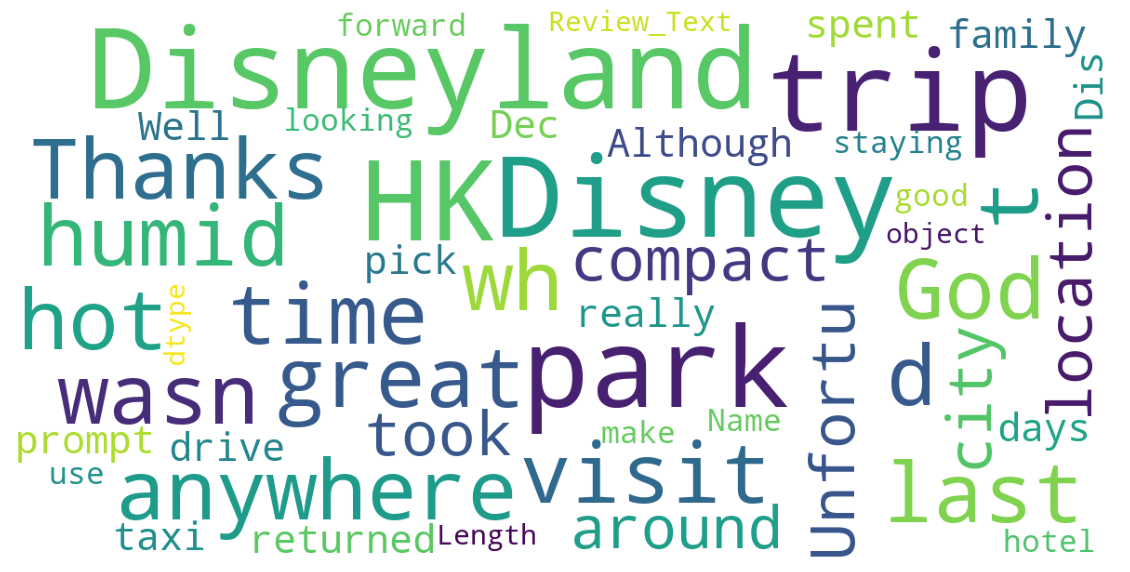

In [21]:
# wordcloud function

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
    

    wordcloud.to_file('wordcloud.png') 
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["Review_Text"])

In [22]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["words"] >= 5].sort_values("pos", ascending = False)[["Review_Text", "pos"]].head(10)

Review_Text    pos
23889  Had a good time at the park we will return aga...  0.863
23486  Loved Everything!!!! Clean, helpful, fun! Fun!...  0.846
27568  We love Disneyland!   Clean, Fun, Exciting, Me...  0.820
9846   Great time clean, friendly, user friendly, gre...  0.819
27975  Love everything about Disneyland. Great rides,...  0.733
36521  Dreams came true.  Unforgettable experience an...  0.714
41134  Excellent service , clean and well organised.....  0.713
26960  Pretty crowded, but always fun. We love Disney...  0.712
11352  Awesome, fun, exciting, adventurous, fantastic...  0.693
31529  great fun, great characters, great shows and p...  0.686

In [23]:
top_ten_df = reviews_df[reviews_df["words"] >= 5].sort_values("pos", ascending = False)[["Review_Text", "pos"]][:10]

In [24]:
# print all positive reviews
pos_review_df = reviews_df[reviews_df["words"] >= 5].sort_values("pos", ascending = False)[["Review_Text", "pos"]]
cl = pos_review_df.loc[:1].values
for c in cl:
    print(c[0])
    print('-'*64)

Had a good time at the park we will return again :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :) :)
----------------------------------------------------------------
Loved Everything!!!! Clean, helpful, fun! Fun! Fun! Fun! Fun! Mickey love! Minnie Love! Loved Disney Park, Loved California Adventure!! Kids loved it too!!!
----------------------------------------------------------------
We love Disneyland!   Clean, Fun, Exciting, Memorable...
----------------------------------------------------------------
Great time clean, friendly, user friendly, great food,  great service, great staff,  Well lit, great layout
----------------------------------------------------------------
Love everything about Disneyland. Great rides, great shows, great food.
----------------------------------------------------------------
Dreams came true.  Unforgettable experience and I can not wait to come back.   Beautiful Beautiful Beautiful Beautiful Beautiful
-------------------------------------------------

We had an amazing day at the two parks. The rides were amazing, and it was truly a wonderful Disney experience. The cast members were all very helpful and everything was perfect. But then Disneyland is the best destination for young and old alike. What fun.
----------------------------------------------------------------
Fun park with lots of amazing rides and activities!  Clean, well kept up, always something going on!  My 9 year old grandson loved Star Tours, Pirates of the Caribbean, the Jungle Cruise, and the Tiki Room the best!  :)
----------------------------------------------------------------
Oh my gosh, so many people but oh so much fun! The Tinkerbell Run was fabulous, Disneyland was fun but very crowded.
----------------------------------------------------------------
A wonderful and magical time to be had.  The characters are fantastic and the parade and fireworks every day are beautiful!  A definite must!
----------------------------------------------------------------
Dis

----------------------------------------------------------------
By all accounts euro Disney is too busy to enjoy. This place still feels new and isn't overcrowded. The kids loved it and I must admit my surprise at not hating it. Some well designed and interesting areas as well as time to relax and stroll. Not bad.
----------------------------------------------------------------
My family and I just love this place. It is expensive but we have so much fun, it does not matter to me. If you want to forget your troubles or just have a great time, just spend the day at Disneyland. Lots of fantastic rides, great parades, fun Disney characters, delicious foods & drinks! We always have so much fun when we go there. One last point! It is such a clean and safe place that it really is worth the money!
----------------------------------------------------------------
I was really hoping to see an amusement based on the Country Bears.  Other than that it was an OK place.  Space Mountain was definit

----------------------------------------------------------------
Avoid going at weekends   queues can be horrific... but great fun otherwise.  Expensive but only to be expected!
----------------------------------------------------------------
Amazing feeling   like being a kid again! Do not miss this, no matter how old you are. It just fills you with the best feeling. Leave yourself plenty of time and then hit Downtown Disney for great shopping and food.
----------------------------------------------------------------
Great place for fun.  They had a lot of cool experiences and a great way to take you out of the ordinary and put you into the stories
----------------------------------------------------------------
We had the best time at Disneyland! And the most delicious food choices! Definetly a family atmosphere
----------------------------------------------------------------
What can you say about the Magic of Disney. It was a wonderful place to visit and enjoy. The rides that were 

I loved it alot, infect i'm thinking to again because it was the ideal break for me. All the rides are good.
----------------------------------------------------------------
Having been to Disney World many times and Disneyland in CA, this Disney was strikingly smaller, but nonetheless enjoyable.  We took the metro there   super easy.
----------------------------------------------------------------
Disneyland is not only liked by Children, but also by elders as well.  Super park with lots of rides, activities, characters, parade etc.  Lot's of entertainment available throughout the day.  Evening Parade followed by Fireworks is amazing.  Children loves the various Disney Characters.
----------------------------------------------------------------
Lot of lovely stuff there. Foods are quite expensive . The visitors should plan very well to join all interesting things with in one day
----------------------------------------------------------------
This was a great day the park is great for

One of the best experiences I ever made! Disneyland park is great and have something for everyone. My favorite was the Star Wars Simulator!
----------------------------------------------------------------
good: yes, this is genuine Disney, so nice etc.bad: super looong queues, some shabby equipment yes, we, of course, had high expectations, given that this is the famous Disney park, and, indeed, it's big, nice and everything. but the overall impression was significantly spoiled by the long queues (and ultra long queues to the most popular and interesting attractions, where the ETA was exceeding 1 hour   crazy!!). also some attractions were not operational, and some had visible signs of wear and shabbiness. and, yeah, it's pretty expensive.
----------------------------------------------------------------
This was my first Disney park I went to and it is still possibly my favourite park out of all of them. The atmosphere is amazing and staff are always friendly, food a bit pricey but tha

----------------------------------------------------------------
This was our first family trip to Disneyland, and we LOVED it. Disney has done a great job marketing happiness, and we bought it hook, line and sinker. It was a GREAT trip for our family and although a handful of rides were closed for refurbishment, late January was a great time to visit. Our favorite rides attractions included Space Mountain and the Parade. 
----------------------------------------------------------------
easily accessible just like other places in HK. The entrance fee just went up to hkd450. Although a bit below my expectation, iam sure children love it and will have one of their best childhood moment here. I enjoyed most the 4D mickey philharmagic show...More
----------------------------------------------------------------
The original park and home of enjoyment. A dream come true to get to Disneyland even if a kidult....forever remember the fireworks display above the Disney castle....beautiful.
-----

----------------------------------------------------------------
The park is truly amazing this is a must go if you havnt already! for children and adults was so nice going back to my childhood!
----------------------------------------------------------------
One of the most magical trips ive ever been on. Staff is amazing and helpful. Will be coming back for sure.
----------------------------------------------------------------
Disneyland was amazing, and definitely met (perhaps even exceeded) our expectations. While there are no really thrilling rides, there are a few decent ones that we enjoyed such as Space Mountain and Splash Mountain. I love the detail put into everything.
----------------------------------------------------------------
Disneyland was excellent!!  A must for families with small children, our kids were 3 and 5, they thoroughly enjoyed it and could go on all rides, which was excellent!
----------------------------------------------------------------
Everyone visiti

Amazing Disneyland fairly new only around 10 years old also very nice gardens immaculate.Kids had an amazing time Worth arriving around lunch time so you can stay for parade and fireworks the kids loved this all so so much Super hot weather very humid and hot fans at various locations Amazing day for young and old Food was very expensive !!
----------------------------------------------------------------
We had a wonderful time at Hong Kong Disneyland. We spent one full day there with our kids and experienced everything pretty much. It is much smaller than Disney in California but just as special. Some different rides to experience and smaller lines which was great compared to America. We still love Disney California better as much larger and more to offer, but we thoroughly enjoyed Hong Kong Disney all the same. The evening parade is not to be missed. Totally amazing. The food in the restaurants was great but very pricy. To be expected I guess, but it was a treat to have mickey mouse 

very big, fun, full or stuff to do and see and an amazing atmosphere and the parades are spectacular.
----------------------------------------------------------------
This is my favourite theme park! Walking through those gates, you are transported into a land of magic and wonder and having been three times now, it never fails to lose it's charm or magic. Great experience for everyone of all ages! Rides are great, food is great, attractions are amazing, character experiences are magical what's not to love? I would definitely recommend staying at the park to watch Disney Illuminations at the castle, it's honestly the most breath taking experience and lots of people have left the park by then.
----------------------------------------------------------------
A great experience, would recommend visiting on a weekday during the morning or afternoon to avoid the crowds.
----------------------------------------------------------------
Definitely worth visiting early before the large crowds st

----------------------------------------------------------------
Had a lot of fun for our first time to Disneyland. We are DISNEY WORLD passholders so we thought we would be disappointed by the size of the parks but we were actually pleasantly surprised and enjoyed both. Even though some rides have the same names as FLORIDA rides, most are completely different which was cool! The Fantasmic (Disneyland) and World of Color (Disney's California Adventure) shows are absolutely TOP NOTCH and the BEST!!!
----------------------------------------------------------------
Disneyland Hong Kong is an amazing experience for the whole family.The train mrt was so easy from Kowloon and hassle free.The rides were great the street shows and fireworks were amazing.The food was good and prices were reasonable.A memorable experience had by the whole family100% recommend
----------------------------------------------------------------
Loved every minute of it. Crowds were huge as it was spring break but the

My daughter and I are Disney history buffs and we love this park.  We were told to be disappointed because it is smaller than Disney World, but forget that, it was great and we loved it.
----------------------------------------------------------------
Disneyland is just amazing, our travel agent told us 2 days was ample   how wrong she was, we needed 2 3 full days here to see and enjoy it all. The night parade has me in tears it was so magical. Cannot wait to return to this Happy Happy place. Spotless and very well organised. Well done America.
----------------------------------------------------------------
Wow what a great day,all the things you hope to see and do are here,it is the happiest place on earth,do make the effort and stay for the spectacular parades 4.30pm and the night lights at 8.30pm,all the Disney characters come to life
----------------------------------------------------------------
Disneyland is a good park for having fun just for a day. You can stay more if you wa

I love Disney! The Paris park is probably my favourite out of a choice of there and Orlando. Less queuing, smaller parks so you can fit everything in. The whole bunch of CM's we met were wonderful. I can't wait to return to my happy place. 
----------------------------------------------------------------
Highly recommend Disney at Christmas time.  The whole park is decorated and the shows are Christmas themed.  Grand Californian hotel is especially fun, Santa is there and everything.
----------------------------------------------------------------
We are Disney World pros and this was our first visit to California and Disneyland. We were very excited but everyone kept warning us that it's not the same as DW... that it was much smaller, etc. Well, the only noticeable thing smaller was the Castle! We thought the park itself was wonderful, especially because they have several rides that DW does not have. My favorite ride is Pirates and I loved how different this one was from DW. Even the 

I visited Disneyland on Christmas day and with all of the holiday festivals it was sooooo magical. Hands down this has been the best experience of my life so far. It   s beautiful, magical, mesmerizing and unique. Photos and video can never capture what you feel and experience within when you visit this place. I just LOVED it
----------------------------------------------------------------
Like all the other Disneylands it can't help but make you feel good. However, the crowds were horrendous with waits of 60 to 75 mins for the better rides. Great if you have kids but not many thrill rides...
----------------------------------------------------------------
Hadn't visited since 2013 and it lived up to our expectations! The scene was set when we arrived on Main Street and it started snowing   magical start to our holiday. We were pleasantly surprised at how quiet the park was   short wait times for rides and getting a good spot for the parade only fifteen minutes before showed this. Impr

----------------------------------------------------------------
The park was a bit tired and needs updating, saying that we did enjoy our two days would definitely recommend travelling off season as the longest we had to wait for a ride was 20mins. Albeit we did wait 1 hour in the cold to see Santa can't say it was amazing I think Disney could do a lot better and made it more of an experience   I have been to Santa trials at home which were better. Parade was very good nice touch adding fake snow kids really enjoyed it. 
----------------------------------------------------------------
We were celebrating my youngest turning 18, Christmas, and his upcoming graduation. We always come when the weather is wonderful and we love Disneyland. The lines seemed longer on one of the days,but it was worth every penny spent on the trip. My son's girlfriend has never been so that was a real experience for her and to see her excitement in every new thing she saw. I hope to plan another trip soon! Th

----------------------------------------------------------------
First time visit to California Disneyland Parks. My husband and I very much enjoyed the parks. We made sure we tried out every ride and attraction that we could! from open to close of each day we had tickets, well worth the sore feet and legs!! 
----------------------------------------------------------------
Its what we expected. The kids 3 and 10 years old enjoyed the attractions. If you've been to any of the other disneylands around the world then its pretty much the same.
----------------------------------------------------------------
One of the better Disneyland's! One thing I love about this one is that all you see past the park boundaries is mountains and trees. Helps keep the magic inside the park. Was still heaps of fun for 3 men on a man trip. Not just for kids!
----------------------------------------------------------------
Came here from Australia for our honeymoon for the soul purpose of going to Disneyland

Staff quite grumpy to say it's a Disney park!! Children would like to see smiles on staff faces especially as they in a Disney park!!
----------------------------------------------------------------
Best place ever. Full of so many thinks to do. A full day is exhausting and so many things to do and see. The food is expensive there and very average. Ride attendants polite and smile. Need much more English speaking staff. Very clean. Transport system is fantastic. It's a must see on your holiday itinerary!
----------------------------------------------------------------
Was lovely to visit at Christmas . Disney really do Christmas well . The decorations , the trees , the parades , was so magical .  Wasn't impressed by the Christmas dreams show having seen dreams lots of times before . Was expecting something amazing...More
----------------------------------------------------------------
Went with the grand kids. Even thou this place was packed everything was still like it was when I firs

Nowadays being a trifle handicapped, we had to meet our grandchildren where we thought it was possible, where you could use a wheelchair. I was surprised ! The whole parc was suited for people with disabilities, we even had favors while waiting in ques. OK it is 20 years old and could use a little paint but this did not matter. Staff was very becoming. Restaurants were always funny and had exciting food. Attractions were brilliant, even for elderly In conclusion: definitely a place to visit with or without children or grandchildren. Stay there for at least 4 days !!
----------------------------------------------------------------
And we will do it again for years and years to come! Always a pleasure, Disney you rock! Lunch at the Plaza Inn is always delicious, and hits the spot. Can't forget caramel popcorn at DCA!
----------------------------------------------------------------
So it was my 23rd birthday present and the day I was going to Disney land Paris! All with my best friend. We

In [25]:
# five random positive reviews
five_rand_pos_reviews = pos_review_df.loc[reviews_df["words"] >= 5].sort_values("pos", ascending = False)[["Review_Text", "pos"]].sample(5).values
for review in five_rand_pos_reviews:
    print(review[0])
    print('-'*64)

My partner and I visited Disneyland Park as we figured it would be a great day out in LA regardless of age! The park is dated and definitely geared towards children. Lots of shows and children's rides but not much for adults. Thunder Mountain, Space Mountain and Haunted Mansion were all closed for repairs, and I'd known this before I wouldn't have gone in. Indian Jones and Splash Mountain had 60  minute wait times. All in all my partner and I spent just over 1 hour there; it felt like a total waste of almost $100 per person and we will never go again. 
----------------------------------------------------------------
We spent more time here than in Disneyland itself this time around. The smaller grandchildren loved the rides here, the 4 year old loved Radiator Springs, the 2 year old the Little Mermaid ride. The only real problem we struck here was a slightly concerning number of ride breakdowns, but it was summer holidays, and everything was going to capacity. 
------------------------

In [26]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["words"] >= 5].sort_values("neg", ascending = False)[["Review_Text", "neg"]].head(10)

Review_Text    neg
5039   Bad experience as the staffs service was not f...  0.513
42032  Dirty dirty dirty    Overpriced poor quality f...  0.495
27423  It is Disneyland... what is not to love??? I w...  0.461
41601  so many rides scary and not so  kids loved the...  0.431
32473  Queues were horrendous, quite a few rides were...  0.392
38985  Rides broken down, terrible food and long queu...  0.388
27287  liked: fireworks show  disliked: no alcohol, l...  0.386
41570  Rude staff, rude customers, too many people, s...  0.385
32243  Not a slick operation   expected better after ...  0.373
40403  Rude staff, bad weather, zero magic. A massive...  0.368

In [27]:
# 5 random negative reviews
five_rand_neg_reviews = reviews_df.loc[reviews_df["words"] >= 5].sort_values("neg", ascending = False)[["Review_Text"]].sample(5).values
for review in five_rand_neg_reviews:
    print(review[0])
    print('-'*64)

Disneyland is just amazing and a full of life. Everywhere there are Cartoon characters. There are kids & cartoon shows everywhere. The rides are simply enjoyable for adults and kids of every age. Amazing restaurants and kids shops scattered everywhere. In short a BLISS.
----------------------------------------------------------------
Definitely this place is for young children and young at heart. The most favorite parts of all of us are the night parade and the fireworks display. it was raining when we visited there   the only thing I noticed is they do not have place to stay in if theres a rain specially i have 4 kids and my smallest is 2 years old.
----------------------------------------------------------------
This is the 2nd time I've been to Hongkong Disneyland. 1st time was in 2007.Not much changes except for some new rides. A new garden is in the making (yet to open).Typical kiddy rides. Its more fun when there's a kid around.2 rides that's more fun in my opinion: Space mountai

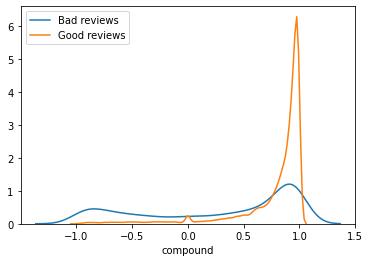

In [28]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_good_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Bad reviews"
    else:
        label = "Good reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [29]:
# feature selection
label = "is_good_review"
ignore_cols = [label, "Review_Text", "review_clean", "Reviewer_Location","Branch",""]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)


In [30]:
reviews_df.dtypes

Review_ID              int64
Rating                 int64
Reviewer_Location     object
Review_Text           object
Branch                object
                      ...   
word_zip             float64
word_zocalo          float64
word_zone            float64
word_zoo             float64
word_zoom            float64
Length: 6711, dtype: object

In [31]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

feature  importance
1                Rating    0.285239
7              compound    0.030279
4                   neg    0.029181
6                   pos    0.025599
5                   neu    0.009011
12     doc2vec_vector_2    0.006883
10     doc2vec_vector_0    0.006288
3760         word_money    0.005857
9                 words    0.005809
8            characters    0.005107
1665  word_disappointed    0.004731
2884          word_hour    0.004360
2630         word_great    0.004317
3473          word_love    0.004310
1094         word_close    0.004289
13     doc2vec_vector_3    0.004084
4419          word_poor    0.003971
4259        word_people    0.003738
14     doc2vec_vector_4    0.003688
4992          word_rude    0.003613

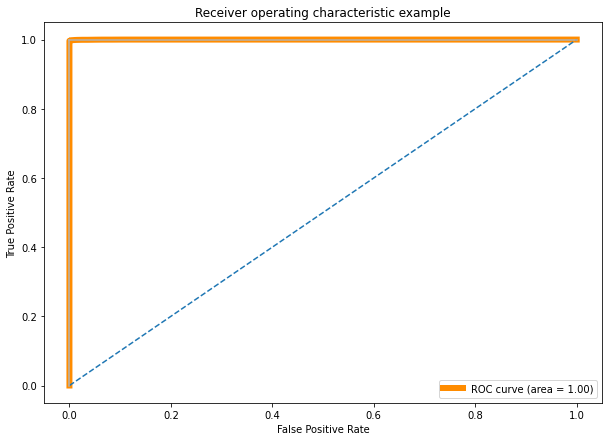

In [33]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (10, 7))
lw = 6
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], linestyle='--')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
!pip install funcsigs

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=1.00')

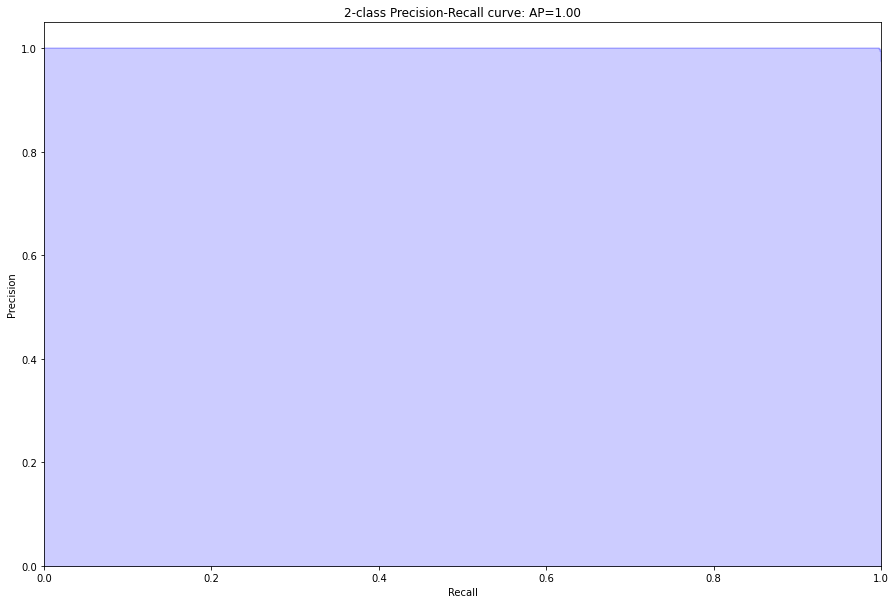

In [35]:
from funcsigs import signature
from sklearn.metrics import average_precision_score, precision_recall_curve

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [36]:
# distribution of review ratings
import plotly.express as px
fig = px.histogram(reviews_df, x="Rating")
fig.show()

In [41]:
df_for_plotting = reviews_df[["Review_ID","Rating","Reviewer_Location","Review_Text","Branch","Year","Month","is_good_review","review_clean","neg","pos","neu","compound","characters","words"]]
df_for_plotting.to_csv('Resources/data_for_plotting.csv', index=False)

In [43]:
df = df_for_plotting[['is_good_review']]
df.is_good_review.unique()

array([1, 0])